<p style="font-size:32px;text-align:center"> <b>EDA-1</b> </p>

# 1. Exploratory Data Analysis

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


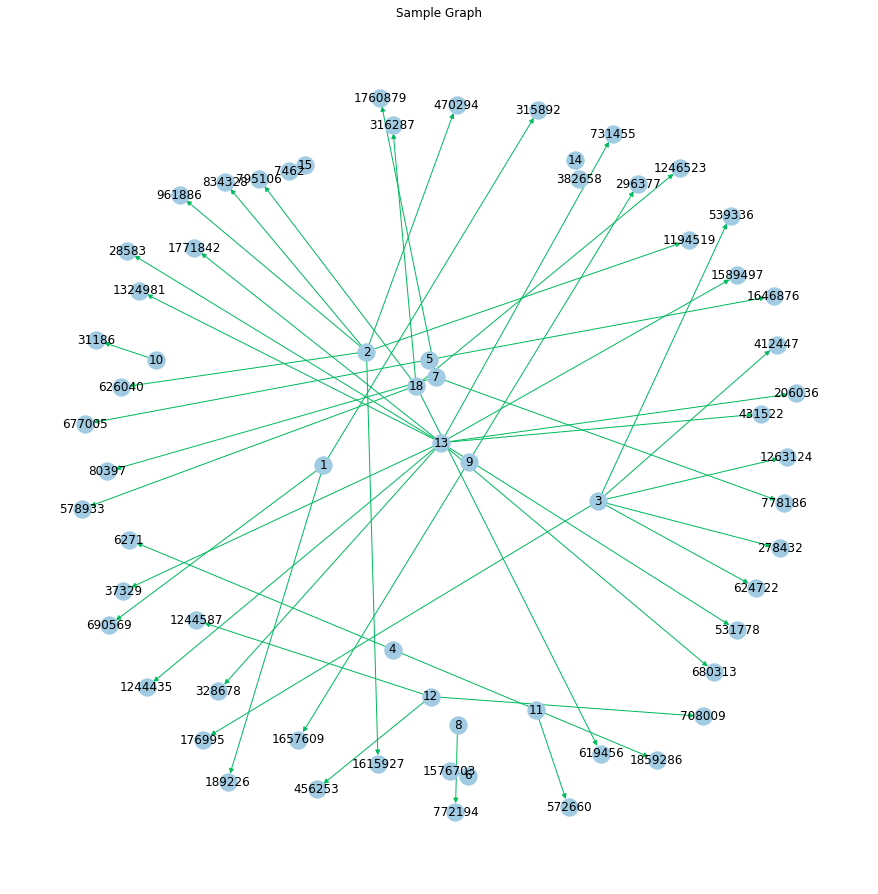

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


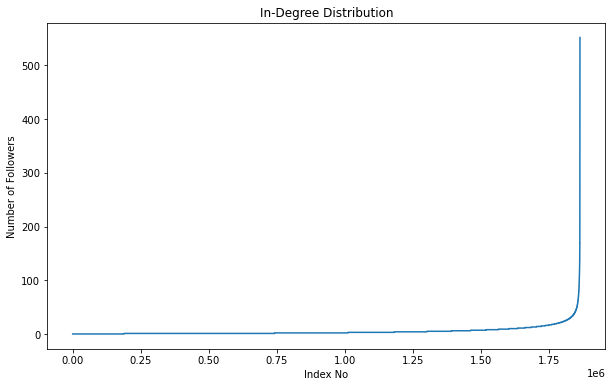

The number of unique persons: 1862220


In [12]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os

# Create directory for saving files if it does not exist
if not os.path.exists('data/after_eda'):
    os.makedirs('data/after_eda')

# Check if preprocessed file exists
if not os.path.isfile('data/after_eda/train_woheader.csv'):
    # Load the dataset
    traincsv = pd.read_csv('/kaggle/input/FacebookRecruiting/train.csv')
    
    # Display missing values and data info
    print("Rows with missing values:")
    print(traincsv[traincsv.isna().any(1)])
    print("\nData info:")
    print(traincsv.info())
    
    # Display number of duplicate entries
    print("\nNumber of duplicate entries:", sum(traincsv.duplicated()))
    
    # Save the dataset without headers
    traincsv.to_csv('data/after_eda/train_woheader.csv', header=False, index=False)
    print("Saved the graph into file")
else:
    try:
        # Load the preprocessed graph
        g = nx.read_edgelist('data/after_eda/train_woheader.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
        print(nx.info(g))
    except Exception as e:
        print(f"Error loading the graph: {e}")

# Sample the dataset for visualization
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('/kaggle/input/FacebookRecruiting/train.csv', nrows=50).to_csv('train_woheader_sample.csv', header=False, index=False)

# Read and visualize the subgraph
try:
    subgraph = nx.read_edgelist('train_woheader_sample.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

    # Draw the graph
    pos = nx.spring_layout(subgraph)
    plt.figure(figsize=(12, 12))
    nx.draw(subgraph, pos, node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)
    plt.title("Graph Visualisation")
    plt.savefig("graph_sample.pdf")
    plt.show()

    # Display information about the subgraph
    print(nx.info(subgraph))  # Number of unique nodes in the sample graph

    # Plot in-degree distribution if the graph is loaded
    if 'g' in locals():
        indegree_dist = list(dict(g.in_degree()).values())
        indegree_dist.sort()
        plt.figure(figsize=(10, 6))
        plt.plot(indegree_dist)
        plt.xlabel('Index No')
        plt.ylabel('Number of Followers')
        plt.title('In-Degree Distribution')
        plt.show()

        # Print the number of unique persons (nodes) in the full graph
        print("The number of unique persons:", len(g.nodes()))
    else:
        print("Graph 'g' is not defined, unable to plot in-degree distribution.")

except Exception as e:
    print(f"Error processing the graph or plotting: {e}")


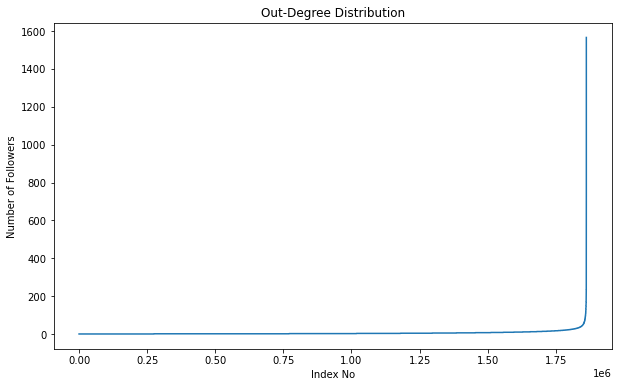

In [14]:
 
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10, 6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('Number of Followers')
plt.title('Out-Degree Distribution')
plt.show()

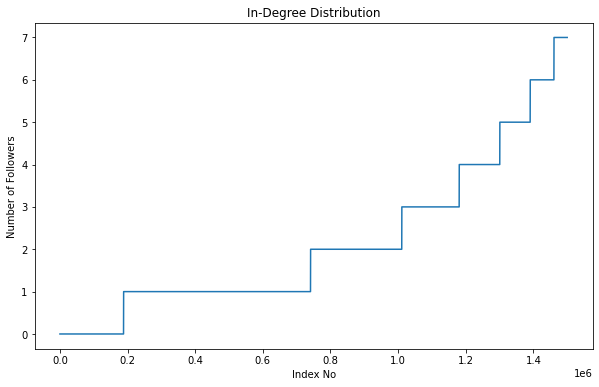

In [15]:
# Ensure 'g' is defined, otherwise, this will fail
import networkx as nx
import matplotlib.pyplot as plt

# Sample graph creation (remove this if you have 'g' already defined in your context)
# g = nx.read_edgelist('path_to_your_file.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

# Compute in-degree distribution
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()

# Plot the first 1,500,000 in-degrees if applicable
plt.figure(figsize=(10, 6))
plt.plot(indegree_dist[:1500000])  # Ensure this range is within the bounds of your dataset
plt.xlabel('Index No')
plt.ylabel('Number of Followers')
plt.title('In-Degree Distribution')
plt.show()


> Displaying a sub graph

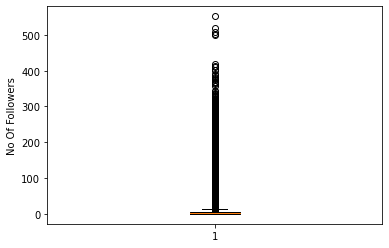

In [16]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [17]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [18]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


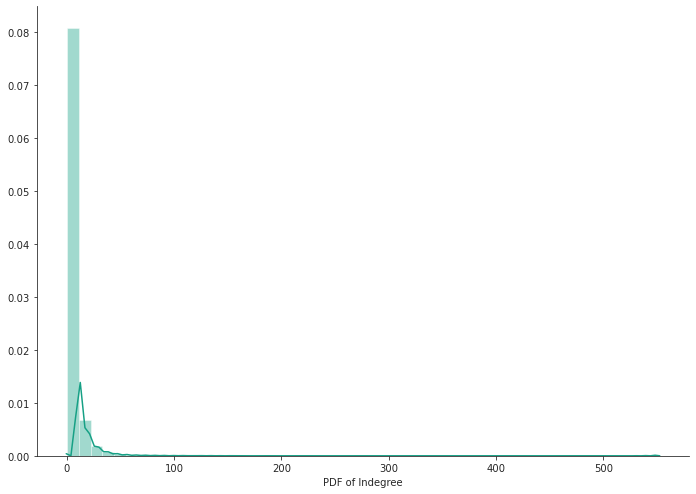

In [19]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

**1.2 Number of people each person is following**

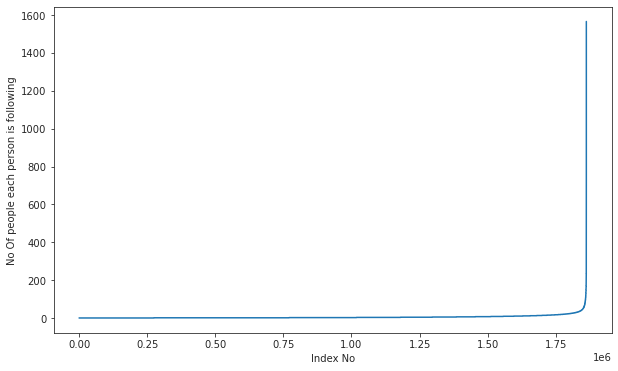

In [20]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

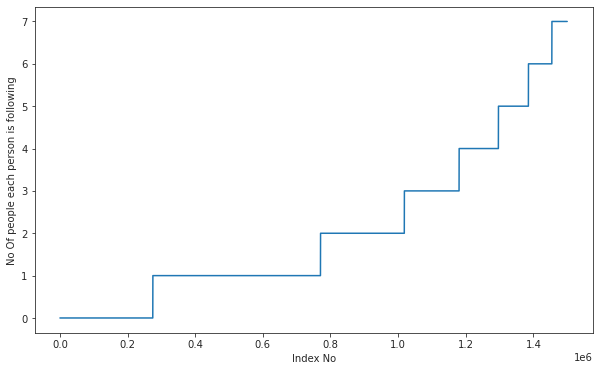

In [21]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

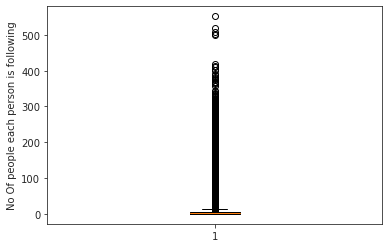

In [22]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [23]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [25]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


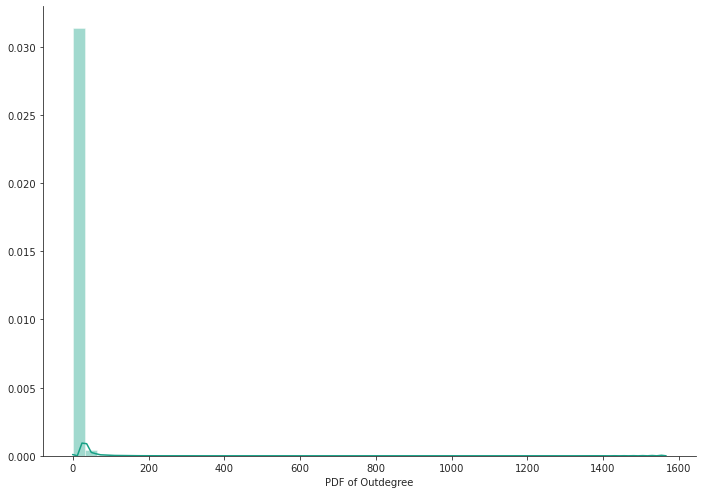

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [27]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [28]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [29]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


**Both followers and following**

In [31]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

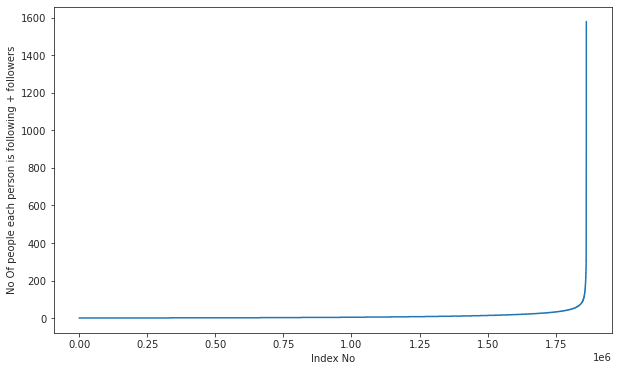

In [32]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

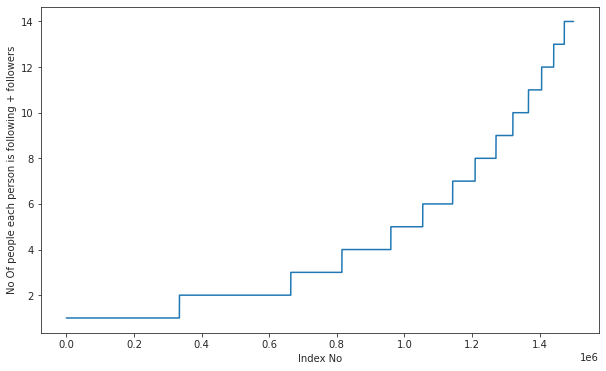

In [33]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [34]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [35]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [36]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [37]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [38]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


In [39]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195
